In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\mohda\Downloads\yellow_tripdata_2020-01 (1).csv")
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4760007,2.0,2020-01-24 19:45:05,2020-01-24 19:50:38,1.0,1.23,1.0,N,238,151,1.0,6.0,1.0,0.5,0.52,0.0,0.3,10.82,2.5
180940,2.0,2020-01-02 07:22:35,2020-01-02 07:27:42,1.0,1.31,1.0,N,237,161,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5
5937180,2.0,2020-01-30 11:01:54,2020-01-30 11:14:14,1.0,1.93,1.0,N,161,143,1.0,10.0,0.0,0.5,3.32,0.0,0.3,16.62,2.5
4935911,2.0,2020-01-25 14:51:33,2020-01-26 14:41:00,1.0,1.88,1.0,N,236,41,1.0,7.5,0.0,0.5,2.16,0.0,0.3,12.96,2.5
16445,2.0,2020-01-01 01:19:52,2020-01-01 01:54:12,1.0,4.65,1.0,N,125,163,1.0,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5


Exploratory data analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [6]:
df.isna().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

Using the drop and fill values formaulae

In [7]:
(65441/len(df))*100

1.021716132126611

In [8]:
df.dropna(inplace= True)

In [9]:
df.shape

(6339567, 18)

In [10]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

In [11]:
df["Duration"]=(df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"])
df["Duration"]=df["Duration"].dt.total_seconds()/60

In [12]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
3160117,1.0,2020-01-16 23:26:32,2020-01-16 23:47:16,1.0,6.40,1.0,N,246,244,1.0,20.5,3.0,0.5,6.05,0.00,0.3,30.35,2.5,20.733333
4850172,2.0,2020-01-25 02:57:11,2020-01-25 03:03:41,1.0,0.88,1.0,N,137,137,1.0,6.5,0.5,0.5,2.06,0.00,0.3,12.36,2.5,6.500000
5313549,1.0,2020-01-27 13:17:20,2020-01-27 13:59:38,1.0,17.60,2.0,N,132,230,1.0,52.0,2.5,0.5,7.00,6.12,0.3,68.42,2.5,42.300000
1038943,1.0,2020-01-07 06:31:01,2020-01-07 06:37:07,1.0,1.30,1.0,N,186,230,1.0,6.5,2.5,0.5,1.95,0.00,0.3,11.75,2.5,6.100000
5326534,2.0,2020-01-27 14:18:54,2020-01-27 14:22:47,1.0,0.93,1.0,N,7,146,2.0,5.0,0.0,0.5,0.00,0.00,0.3,5.80,0.0,3.883333


In [13]:
df = df[["passenger_count","payment_type","fare_amount","trip_distance","Duration"]]

In [14]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


Converting the float value into int

In [15]:
df.columns

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'Duration'],
      dtype='object')

In [16]:
df["passenger_count"] = df["passenger_count"].astype("int64")
df["payment_type"] = df["payment_type"].astype("int64")

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


Checking the duplicated values

In [18]:
df.duplicated().value_counts()

True     3331706
False    3007861
Name: count, dtype: int64

In [19]:
(3331706/len(df))*100

52.55415708990851

In [20]:
df.drop_duplicates(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [21]:
df["passenger_count"].value_counts(normalize=True) #normalize = True provide the percentage

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [22]:
df["payment_type"].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

Taking the values specific

In [23]:
df = df[df["payment_type"]<3]
df= df[(df["passenger_count"]>0) &(df["passenger_count"]<6)]

In [24]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


Replacing the values

In [25]:
df["payment_type"].replace([1,2],["Card","Cash"],inplace=True)

In [26]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [27]:
df.describe(include="all",
           percentiles=[ele/10 for ele in range(1,10)]).T

,count,unique,top,freq,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
passenger_count,2780283.0,NaN,NaN,NaN,1.733386,1.176652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0
payment_type,2780283,2,Card,1907801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,2780283.0,NaN,NaN,NaN,17.805672,15.069975,-500.0,6.0,8.0,9.5,11.5,13.0,15.5,18.5,24.5,36.5,4265.0
trip_distance,2780283.0,NaN,NaN,NaN,4.536729,4.89589,-22.18,0.85,1.29,1.71,2.18,2.73,3.45,4.6,6.71,10.9,262.88
Duration,2780283.0,NaN,NaN,NaN,24.15478,92.600315,-2770.366667,5.866667,8.65,11.05,13.366667,15.733333,18.333333,21.45,25.7,33.166667,8525.116667


In [28]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [29]:
df =df[df["fare_amount"]>0]
df= df[df["trip_distance"]>0]
df = df[df["Duration"]>0]

In [30]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Outliers

* to remove the outliers we use zscore or interquartile

In [31]:
df.columns

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'Duration'],
      dtype='object')

In [32]:
for col in ["fare_amount","trip_distance","Duration"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


Ploting for distribution

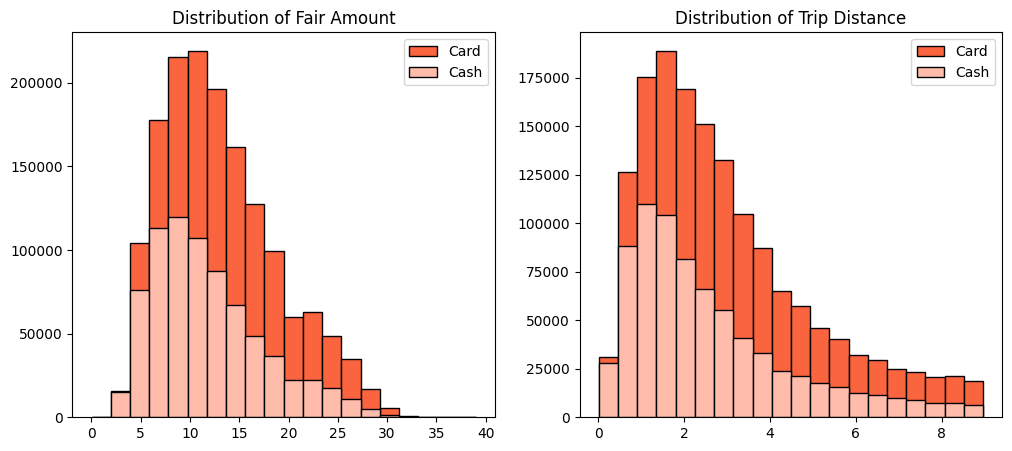

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Fair Amount")
plt.hist(df[df["payment_type"]=="Card"]["fare_amount"],histtype="barstacked",bins=20, edgecolor="k",color = "#FA643F",label="Card")
plt.hist(df[df["payment_type"]=="Cash"]["fare_amount"],histtype="barstacked",bins=20,edgecolor="k",color="#FFBCAB",label="Cash")
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of Trip Distance")
plt.hist(df[df["payment_type"]=="Card"]["trip_distance"],histtype="barstacked",bins=20, edgecolor="k",color = "#FA643F",label="Card")
plt.hist(df[df["payment_type"]=="Cash"]["trip_distance"],histtype="barstacked",bins=20,edgecolor="k",color="#FFBCAB",label="Cash")
plt.legend()
plt.show()

In [34]:
df.groupby("payment_type").agg({"fare_amount":["mean","std"],"trip_distance":["mean","std"]})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

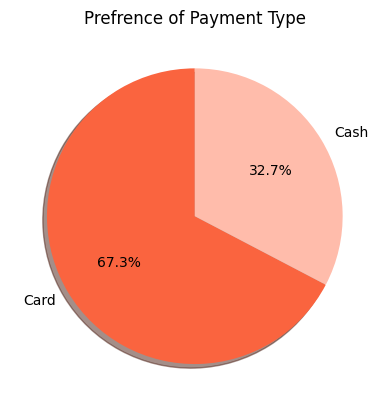

In [35]:
plt.title("Prefrence of Payment Type")
plt.pie(df["payment_type"].value_counts(normalize=True),labels=df["payment_type"].value_counts().index,
        startangle=90,shadow=True,autopct='%1.1f%%',colors=["#FA643F","#FFBCAB"])
plt.show()

Stacked barchart

In [36]:
passenger_count = df.groupby(["payment_type","passenger_count"])[["passenger_count"]].count()
passenger_count.rename(columns={"passenger_count":"count"},inplace=True)
passenger_count.reset_index(inplace=True)

In [37]:
passenger_count["percentage"]= (passenger_count["count"]/passenger_count["count"].sum())*100

In [38]:
passenger_count

,payment_type,passenger_count,count,percentage
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [39]:
df1 = pd.DataFrame(columns=["payment_type",1,2,3,4,5])
df1["payment_type"]=["card","cash"]
df1.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df1.iloc[1,1:] = passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


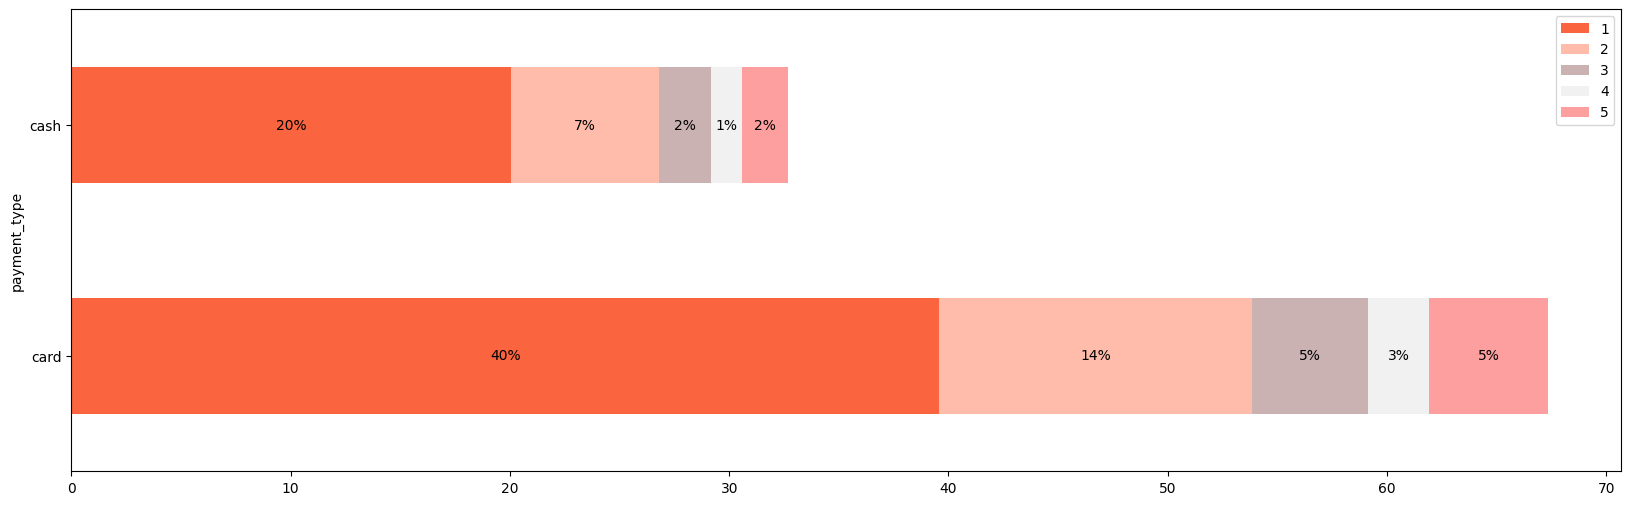

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))
df1.plot(x="payment_type", kind="barh", stacked=True, color=["#FA643F", "#FFBCAB", "#CBB2B2", "#F1F1F1", "#FD9F9F"], ax=ax)

# Adding the percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            "{:.0f}%".format(width),  # Corrected to multiply by 100 to get percentage
            horizontalalignment="center",
            verticalalignment="center")
            
plt.show()


##### **Null hypothesis** : "There is no difference in avareage fare between the customers who use the credit cards and customers who uses he cash"
##### **Alternative hypothesis** : "There is a difference in average fare between customers who uses credit cards and customers who use cash" 

In [41]:
df.columns

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'Duration'],
      dtype='object')

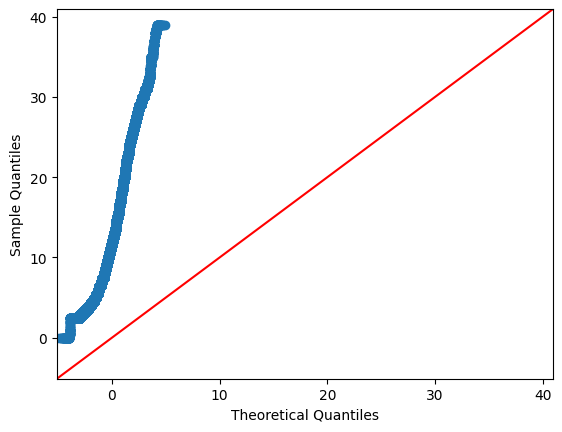

In [42]:
sm.qqplot(df["fare_amount"],line="45")
plt.show()

Creating the samples for card and cash

In [46]:
card_sample = df[df["payment_type"]=="Card"]["fare_amount"]
cash_sample = df[df["payment_type"]=="Cash"]["fare_amount"]

Performaing the tstats 

In [47]:
t_stats,p_value =st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print("T statistic",t_stats,"p_value",p_value)

T statistic 169.2111527245052 p_value 0.0
